In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import re
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import datetime as dt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
bitcoin_df = pd.read_csv('combined_bitcoin.csv')
ethereum_df = df = pd.read_csv('combined_ethereum.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
bitcoin_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455323769807859713,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,Some take this further to create new crypto to...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455323767119437827,1455323767119437827,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1088685090140549121,ajh_23_,AJH☃️🎄🎅🏼,NaN,"@AaronRodgers12, thank you for the #Bitcoin ba...",en,[],[],['https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv....,0,0,0,['bitcoin'],[],https://twitter.com/AJH_23_/status/14553237671...,False,NaN,1,https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455323766326652932,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,For any other Crypto Money (opposed to other t...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455323764598534149,1455323754838458369,2021-11-01 19:59:58 Eastern Daylight Time,2021-11-01,19:59:58,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,Bitcoin builds trust/faith by changing it's co...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455323759649255427,1455323754838458369,2021-11-01 19:59:57 Eastern Daylight Time,2021-11-01,19:59:57,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,Bitcoin and all the Crypto derivatives are sai...,en,[],[],[],1,0,5,[],[],https://twitter.com/joinseeds/status/145532375...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
bitcoin_df['tweet'] = bitcoin_df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ethereum_df['tweet'] = ethereum_df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
bitcoin_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455323769807859713,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,some take this further to create new crypto to...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455323767119437827,1455323767119437827,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1088685090140549121,ajh_23_,AJH☃️🎄🎅🏼,NaN,"@aaronrodgers12, thank you for the #bitcoin ba...",en,[],[],['https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv....,0,0,0,['bitcoin'],[],https://twitter.com/AJH_23_/status/14553237671...,False,NaN,1,https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455323766326652932,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,for any other crypto money (opposed to other t...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455323764598534149,1455323754838458369,2021-11-01 19:59:58 Eastern Daylight Time,2021-11-01,19:59:58,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin builds trust/faith by changing it's co...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455323759649255427,1455323754838458369,2021-11-01 19:59:57 Eastern Daylight Time,2021-11-01,19:59:57,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin and all the crypto derivatives are sai...,en,[],[],[],1,0,5,[],[],https://twitter.com/joinseeds/status/145532375...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
bitcoin_df['tweet'] = bitcoin_df['tweet'].str.replace('[^a-zA-Z0-9 \n\.]','')
ethereum_df['tweet'] = ethereum_df['tweet'].str.replace('[^a-zA-Z0-9 \n\.]','')

In [ ]:
bitcoin_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455323769807859713,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,some take this further to create new crypto to...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455323767119437827,1455323767119437827,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1088685090140549121,ajh_23_,AJH☃️🎄🎅🏼,NaN,aaronrodgers12 thank you for the bitcoin babyy...,en,[],[],['https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv....,0,0,0,['bitcoin'],[],https://twitter.com/AJH_23_/status/14553237671...,False,NaN,1,https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455323766326652932,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,for any other crypto money opposed to other to...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455323764598534149,1455323754838458369,2021-11-01 19:59:58 Eastern Daylight Time,2021-11-01,19:59:58,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin builds trustfaith by changing its code...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455323759649255427,1455323754838458369,2021-11-01 19:59:57 Eastern Daylight Time,2021-11-01,19:59:57,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin and all the crypto derivatives are sai...,en,[],[],[],1,0,5,[],[],https://twitter.com/joinseeds/status/145532375...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
stop = stopwords.words('english')
bitcoin_df['tweet'] = bitcoin_df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ethereum_df['tweet'] = ethereum_df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
bitcoin_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455323769807859713,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,take create new crypto tokens backed usdc even...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455323767119437827,1455323767119437827,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1088685090140549121,ajh_23_,AJH☃️🎄🎅🏼,NaN,aaronrodgers12 thank bitcoin babyyy httpst.coi...,en,[],[],['https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv....,0,0,0,['bitcoin'],[],https://twitter.com/AJH_23_/status/14553237671...,False,NaN,1,https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455323766326652932,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,crypto money opposed tools survive bitcoin nee...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455323764598534149,1455323754838458369,2021-11-01 19:59:58 Eastern Daylight Time,2021-11-01,19:59:58,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin builds trustfaith changing codepolicie...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455323759649255427,1455323754838458369,2021-11-01 19:59:57 Eastern Daylight Time,2021-11-01,19:59:57,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin crypto derivatives said trustless. isn...,en,[],[],[],1,0,5,[],[],https://twitter.com/joinseeds/status/145532375...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
st = PorterStemmer()
bitcoin_df['tweet'] = bitcoin_df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
ethereum_df['tweet'] = ethereum_df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
bitcoin_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455323769807859713,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,take creat new crypto token back usdc even bac...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455323767119437827,1455323767119437827,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1088685090140549121,ajh_23_,AJH☃️🎄🎅🏼,NaN,aaronrodgers12 thank bitcoin babyyi httpst.coi...,en,[],[],['https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv....,0,0,0,['bitcoin'],[],https://twitter.com/AJH_23_/status/14553237671...,False,NaN,1,https://pbs.twimg.com/media/FDJZOQ-XoAQY6pv.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455323766326652932,1455323754838458369,2021-11-01 19:59:59 Eastern Daylight Time,2021-11-01,19:59:59,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,crypto money oppos tool surviv bitcoin need ta...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455323764598534149,1455323754838458369,2021-11-01 19:59:58 Eastern Daylight Time,2021-11-01,19:59:58,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin build trustfaith chang codepolici litt...,en,[],[],[],1,0,4,[],[],https://twitter.com/joinseeds/status/145532376...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455323759649255427,1455323754838458369,2021-11-01 19:59:57 Eastern Daylight Time,2021-11-01,19:59:57,-500,1133340665692037120,joinseeds,🌍 Regenerative Renaissance 🌎 SEEDS (Hiring),NaN,bitcoin crypto deriv said trustless. isnt quit...,en,[],[],[],1,0,5,[],[],https://twitter.com/joinseeds/status/145532375...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
def polarity(x):
  return TextBlob(x).sentiment[0]
def subjectivity(x):
  return TextBlob(x).sentiment[1]

In [ ]:
bitcoin_df['polarity'] = bitcoin_df['tweet'].apply(polarity)
bitcoin_df['subjectivity'] = bitcoin_df['tweet'].apply(subjectivity)
ethereum_df['polarity'] = ethereum_df['tweet'].apply(polarity)
ethereum_df['subjectivity'] = ethereum_df['tweet'].apply(subjectivity)

In [ ]:
bitcoin_df.polarity.head()

0    0.054545
1    0.000000
2    0.000000
3   -0.050000
4    0.350000
Name: polarity, dtype: float64

In [ ]:
bitcoin_df.subjectivity.head()

0    0.181818
1    0.000000
2    0.000000
3    0.400000
4    0.650000
Name: subjectivity, dtype: float64

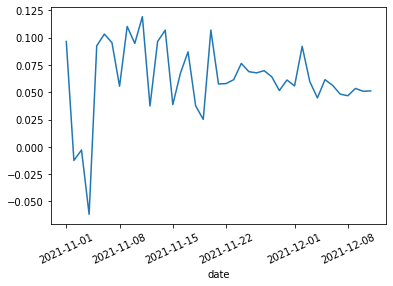

In [ ]:
bitcoin_df["date"] = pd.to_datetime(bitcoin_df["date"])
bitcoin_df.groupby(bitcoin_df['date'].dt.date)["polarity"].mean().plot(kind="line",rot=25)

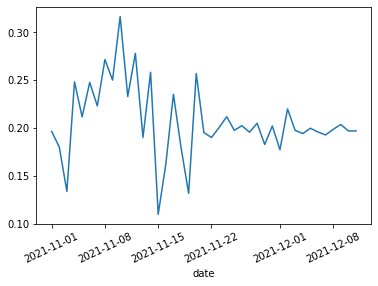

In [ ]:
bitcoin_df.groupby(bitcoin_df['date'].dt.date)["subjectivity"].mean().plot(kind="line",rot=25)

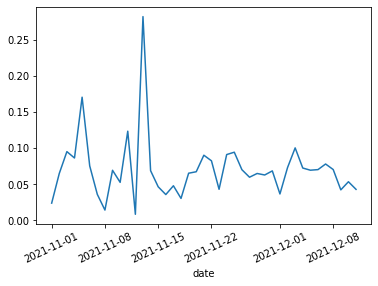

In [ ]:
ethereum_df["date"] = pd.to_datetime(ethereum_df["date"])
ethereum_df.groupby(ethereum_df['date'].dt.date)["polarity"].mean().plot(kind="line",rot=25)

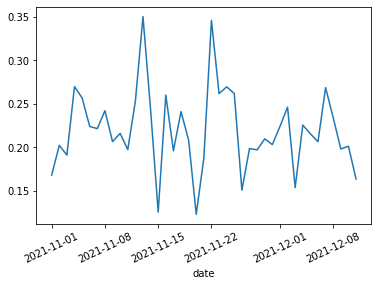

In [ ]:
ethereum_df.groupby(ethereum_df['date'].dt.date)["subjectivity"].mean().plot(kind="line",rot=25)

In [ ]:
bitcoin_df.drop(bitcoin_df.columns.difference(['id','date', 'time', 'tweet', 'polarity', 'subjectivity']), 1, inplace=True)
ethereum_df.drop(ethereum_df.columns.difference(['id','date', 'time', 'tweet', 'polarity', 'subjectivity']), 1, inplace=True)

In [ ]:
bitcoin_df.to_csv("bitcoin_sentiment.csv")
ethereum_df.to_csv("ethereum_sentiment.csv")